In [1]:
from aann.utils.graph import get_model_graph, nx2gt
from aann.dataset import Dataset

from aann.models import SimpleModel
from aann.utils.image import cv2pil, scale_image

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1500: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [2]:
def show_image(dataset_item: dict):
    image = dataset_item["img_features"].numpy()
    image = (image * 128).astype("uint8")
    image = image.reshape(8, 8)
    display(cv2pil(scale_image(image, (256, 256))))

In [3]:
dataset = Dataset()
dataset.load()

In [5]:
model = SimpleModel(
    num_in_features=dataset.num_in_features,
    num_classes=dataset.num_classes,
)

In [ ]:
# model.train(train_dp_dataset=dataset.train)
# model.save()

In [6]:
model.load()
model.model

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Model(
  (lin1): Linear(in_features=64, out_features=8, bias=False)
  (sig1): Sigmoid()
  (lin_out): Linear(in_features=8, out_features=4, bias=False)
  (ce_loss): CrossEntropyLoss()
  (f1): MulticlassF1Score()
)

In [7]:
# train_iter = iter(dataset.train)

In [8]:
# dataset_item = next(train_iter)
# pred = model.dataset_item_predict(dataset_item)
# show_image(dataset_item)

# print(f"class:      {dataset_item['y']}")
# print(f"pred_class: {pred}")

In [9]:
import matplotlib

import graph_tool.all as gt
import numpy as np

In [57]:
nx_graph = get_model_graph(model, min_weight=0.6)

print(f"nodes: {nx_graph.number_of_nodes()}")
print(f"edges: {nx_graph.number_of_edges()}")

nodes: 76
edges: 114


In [58]:
gt_graph = nx2gt(nx_graph)

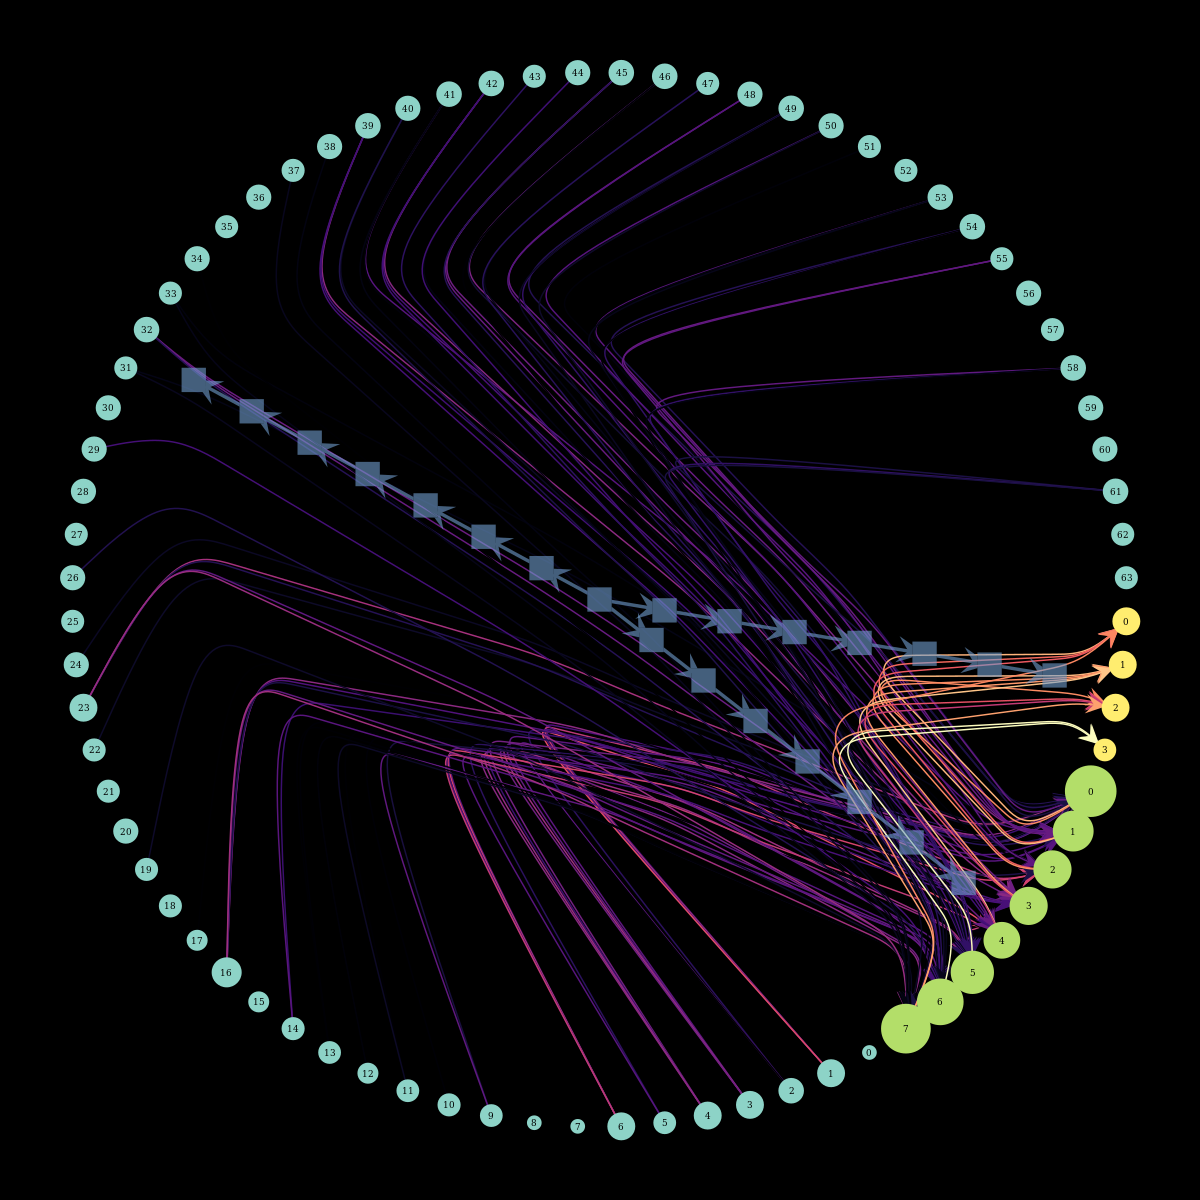

In [120]:
# gt.seed_rng(42)
# np.random.seed(42)
state = gt.NestedBlockState(
    gt_graph,
    clabel=gt_graph.vp.layer,
)

_ = state.draw(
    bg_color="black",
    # edge_color=gt.prop_to_size(gt_graph.ep.type, power=1, log=True),
    # vorder=gt_graph.vp.square_id,
    # # nodesfirst=True,
    vertex_text=gt_graph.vp.neuron,
    vertex_fill_color=gt_graph.vp.layer,
    # vertex_shape=gt_graph.vp.piece_type,
    # output_size=(1024, 1024),
    edge_marker_size=10,
    beta=0.5,
    rel_order=gt_graph.vp.neuron,
    vertex_anchor=10,
    vertex_halo=True,
    vertex_halo_color=gt_graph.vp.layer,
    vcmap=(matplotlib.cm.Set3, 1.0),
    # ecmap=(matplotlib.cm.Pastel1, 0.6),
    # edge_color=gt.prop_to_size(gt_graph.ep.type, power=1,),
    # edge_pen_width=gt.prop_to_size(gt_graph.ep.type, mi=1, ma=4, power=1),
    edge_gradient=[],
    # eorder=gt_graph.ep.type
    edge_color=gt.prop_to_size(gt_graph.ep.weight, power=1),
    ecmap=(matplotlib.cm.magma, 1.0),
    # ecmap=(matplotlib.cm.Pastel1, 0.6),
    # eorder=gt_graph.ep.weight,
    # edge_pen_width=gt.prop_to_size(gt_graph.ep.weight, 1, 3, power=1, log=1),
    # layout="bipartite",
    # bip_aspect=1.0
)